In [10]:
import torch

# Create a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)

# Define a simple function
y = 3 * x**2 + 2 * x + 1
print("y =", y)

# Backpropagate
y.backward()
print("dy/dx =", x.grad)

y = tensor(17., grad_fn=<AddBackward0>)
dy/dx = tensor(14.)


Epoch0: Loss: 0.637692
Epoch100: Loss: 0.441592
Epoch200: Loss: 0.363878
Epoch300: Loss: 0.323305
Epoch400: Loss: 0.298797
Epoch500: Loss: 0.281544
Epoch600: Loss: 0.266930
Epoch700: Loss: 0.251548
Epoch800: Loss: 0.235690
Epoch900: Loss: 0.219741


/var/folders/gz/dmgp544n7fxgbfjvkgbjb0vm0000gn/T/ipykernel_59004/905914678.py:43: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
/var/folders/gz/dmgp544n7fxgbfjvkgbjb0vm0000gn/T/ipykernel_59004/905914678.py:44: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.arange(y_min, y_max, 0.02))


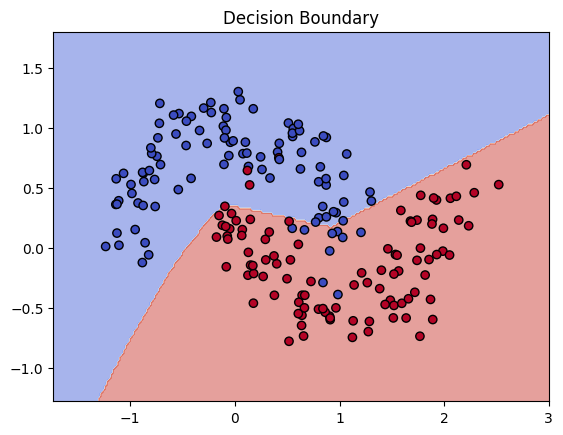

In [20]:
# Build first neural network in pytorch
import torch
from torch import nn, optim
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
torch.manual_seed(42)
# Create moon-shaped synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2) #creates a 2D classification dataset shaped like two interleaved half circles (aka “moons”)
#Without noise: the classes are perfectly separable; with noise: getting fuzzier, better for real-world simulation[non-linear model[2D, easy to visualize]]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

#Define the model
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 2)
)

#loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

#Training Loop
for epoch in range(1000):
    #Forward
    logits = model(X)
    loss = loss_fn(logits, y)
    #Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:  #every 100 epochs do sth.
        print(f"Epoch{epoch}: Loss: {loss.item():4f}")

#Plot Decision Boundary
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        pred = model(grid)
        pred = pred.argmax(dim=1).reshape(xx.shape)
    plt.contourf(xx, yy, pred, cmap="coolwarm", alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, X, y)
